In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_path= "/content/drive/MyDrive/7072CEM/Lecture3/Data/multivariate_linear_regression_data.csv"

Dataset:
          X1         X2         X3         X4         X5          Y
0  3.745401  13.963234   5.553988  20.763271  13.085284  51.925105
1  9.507143  10.721927  16.257028  19.167275  12.348940  75.202662
2  7.319939   6.190552  26.188375   1.025683  45.312729 -51.864365
3  5.986585  16.275900  21.966747  13.649913  12.477310  41.394019
4  1.560186  13.694623  24.196834  15.207825  13.597486  37.031141

Correlation Matrix:
           X1        X2        X3        X4        X5         Y
X1  1.000000  0.010354  0.053966 -0.014562  0.004400  0.128840
X2  0.010354  1.000000 -0.025912  0.000523 -0.027506 -0.106482
X3  0.053966 -0.025912  1.000000  0.005223  0.103376  0.090351
X4 -0.014562  0.000523  0.005223  1.000000  0.000256  0.792063
X5  0.004400 -0.027506  0.103376  0.000256  1.000000 -0.557304
Y   0.128840 -0.106482  0.090351  0.792063 -0.557304  1.000000

Model Coefficients: [ 2.34417385 -1.09608362  0.8075128   3.60486752 -2.09552538]
Model Intercept: 4.600247203972835

Mean S

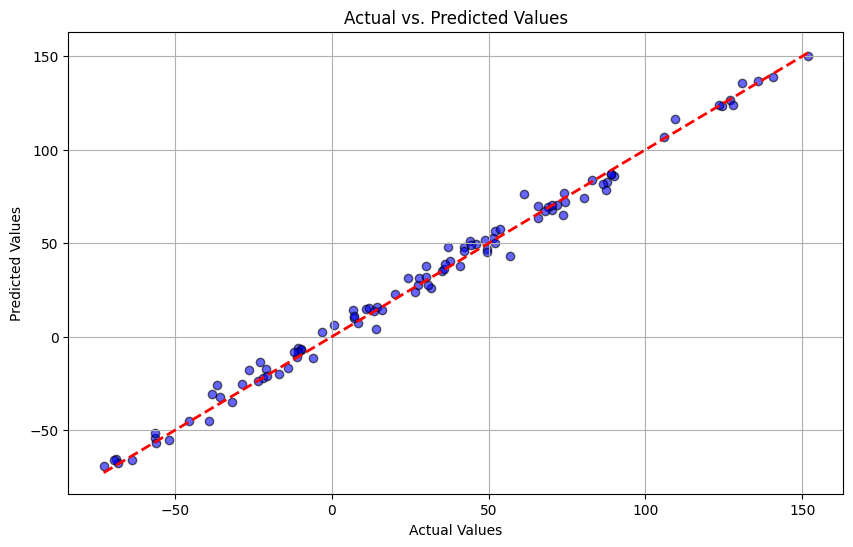

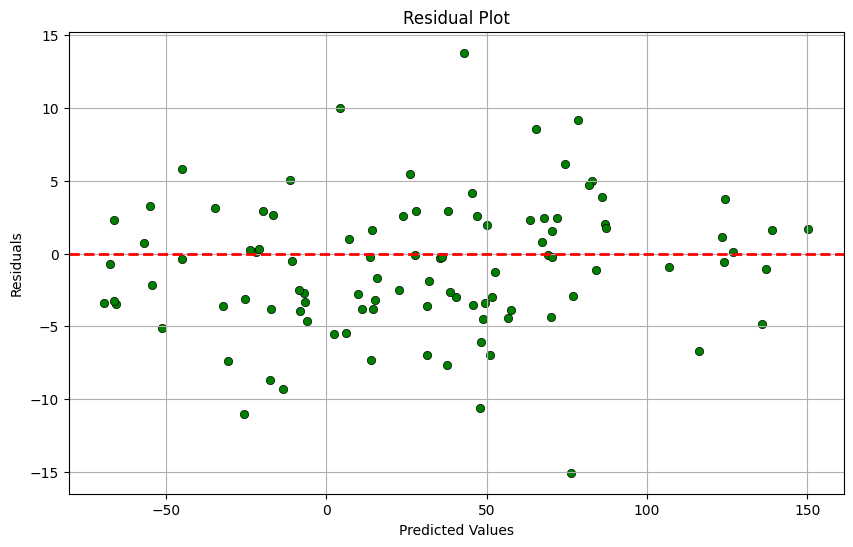

<ipython-input-4-c029a021ccfc>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Coefficient', data=coefficients, palette='viridis')


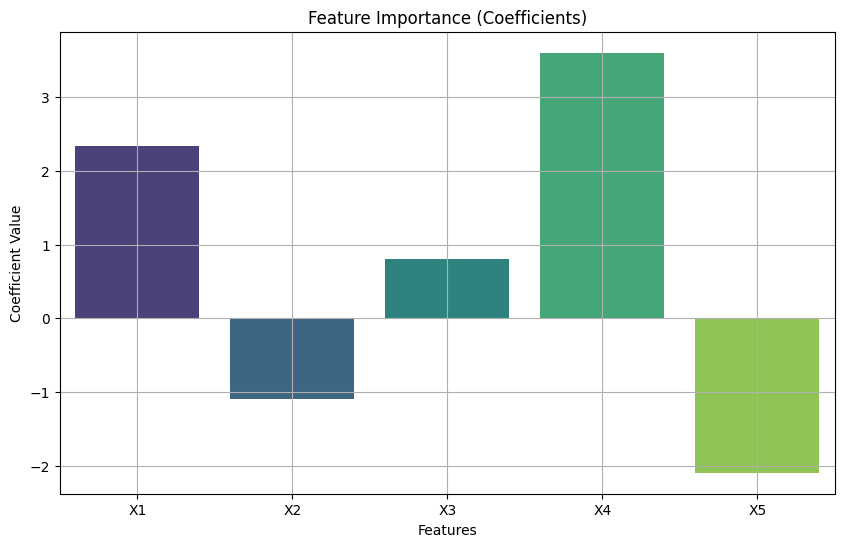

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
print("Dataset:\n", data.head())

# Calculate the correlation matrix
correlation_matrix = data.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Splitting the data into features (X) and target (Y)
X = data[['X1', 'X2', 'X3', 'X4', 'X5']]
Y = data['Y']

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Coefficients of the linear regression model
print("\nModel Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Making predictions
Y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("\nMean Squared Error:", mse)
print("R-squared:", r2)

# 1. Plotting Actual vs. Predicted values
plt.figure(figsize=(10,6))
plt.scatter(Y_test, Y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

# 2. Residual Plot (Actual - Predicted)
residuals = Y_test - Y_pred
plt.figure(figsize=(10,6))
sns.scatterplot(x=Y_pred, y=residuals, color='green', edgecolor='k')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# 3. Feature Importance (Coefficient Plot)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

plt.figure(figsize=(10,6))
sns.barplot(x='Feature', y='Coefficient', data=coefficients, palette='viridis')
plt.title('Feature Importance (Coefficients)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()
